In [1]:
import uproot
import pandas as pd
import numpy as np
from pylorentz import Momentum4
import matplotlib.pyplot as plt

In [2]:
tree_tt = uproot.open("/vols/cms/dw515/Offline/output/SM/master_gen_ntuple_1502/MVAFILE_tt.root")["ntuple"]

In [3]:
tree_tt.keys()

[b'rand',
 b'wt_cp_sm',
 b'wt_cp_ps',
 b'wt_cp_mm',
 b'pi_px_1',
 b'pi_py_1',
 b'pi_pz_1',
 b'pi_E_1',
 b'pi2_px_1',
 b'pi2_py_1',
 b'pi2_pz_1',
 b'pi2_E_1',
 b'pi3_px_1',
 b'pi3_py_1',
 b'pi3_pz_1',
 b'pi3_E_1',
 b'pi_px_2',
 b'pi_py_2',
 b'pi_pz_2',
 b'pi_E_2',
 b'pi2_px_2',
 b'pi2_py_2',
 b'pi2_pz_2',
 b'pi2_E_2',
 b'pi3_px_2',
 b'pi3_py_2',
 b'pi3_pz_2',
 b'pi3_E_2',
 b'pi0_px_1',
 b'pi0_py_1',
 b'pi0_pz_1',
 b'pi0_E_1',
 b'pi0_px_2',
 b'pi0_py_2',
 b'pi0_pz_2',
 b'pi0_E_2',
 b'nu_px_1',
 b'nu_py_1',
 b'nu_pz_1',
 b'nu_E_1',
 b'nu_px_2',
 b'nu_py_2',
 b'nu_pz_2',
 b'nu_E_2',
 b'sv_x_1',
 b'sv_y_1',
 b'sv_z_1',
 b'sv_x_2',
 b'sv_y_2',
 b'sv_z_2',
 b'ip_x_1',
 b'ip_y_1',
 b'ip_z_1',
 b'ip_x_2',
 b'ip_y_2',
 b'ip_z_2',
 b'dm_1',
 b'dm_2',
 b'metx',
 b'mety',
 b'reco_sv_x_1',
 b'reco_sv_y_1',
 b'reco_sv_z_1',
 b'reco_ip_x_1',
 b'reco_ip_y_1',
 b'reco_ip_z_1',
 b'reco_dm_1',
 b'reco_metx',
 b'reco_mety',
 b'reco_pi_px_1',
 b'reco_pi_py_1',
 b'reco_pi_pz_1',
 b'reco_pi_E_1',
 b'reco_pi0_

In [4]:
variables = ['rand','wt_cp_sm','wt_cp_ps','wt_cp_mm','pi_px_1','pi_py_1','pi_pz_1','pi_E_1','pi2_px_1','pi2_py_1','pi2_pz_1','pi2_E_1','pi3_px_1', 'pi3_py_1', 'pi3_pz_1', 'pi3_E_1', 'pi_px_2', 'pi_py_2',
 'pi_pz_2', 'pi_E_2', 'pi2_px_2', 'pi2_py_2', 'pi2_pz_2', 'pi2_E_2', 'pi3_px_2', 'pi3_py_2', 'pi3_pz_2',
 'pi3_E_2', 'pi0_px_1', 'pi0_py_1',
 'pi0_pz_1', 'pi0_E_1', 'pi0_px_2',
 'pi0_py_2', 'pi0_pz_2', 'pi0_E_2',
 'nu_px_1', 'nu_py_1', 'nu_pz_1', 'nu_E_1', 'nu_px_2', 'nu_py_2', 'nu_pz_2',
 'nu_E_2', 'sv_x_1', 'sv_y_1', 'sv_z_1', 'sv_x_2', 'sv_y_2', 'sv_z_2',
 'ip_x_1',
 'ip_y_1',
 'ip_z_1',
 'ip_x_2',
 'ip_y_2',
 'ip_z_2',
 'dm_1',
 'dm_2',
 'metx',
 'mety',
 'reco_sv_x_1',
 'reco_sv_y_1',
 'reco_sv_z_1',
 'reco_ip_x_1',
 'reco_ip_y_1',
 'reco_ip_z_1',
 'reco_dm_1',
 'reco_metx',
 'reco_mety',
 'reco_pi_px_1',
 'reco_pi_py_1',
 'reco_pi_pz_1',
 'reco_pi_E_1',
 'reco_pi0_px_1',
 'reco_pi0_py_1',
 'reco_pi0_pz_1',
 'reco_pi0_E_1']

df = tree_tt.pandas.df(variables)

In [5]:
df.head()

,rand,wt_cp_sm,wt_cp_ps,wt_cp_mm,pi_px_1,pi_py_1,pi_pz_1,pi_E_1,pi2_px_1,pi2_py_1,...,reco_metx,reco_mety,reco_pi_px_1,reco_pi_py_1,reco_pi_pz_1,reco_pi_E_1,reco_pi0_px_1,reco_pi0_py_1,reco_pi0_pz_1,reco_pi0_E_1
entry,,,,,,,,,,,,,,,,,,,,,
0,0.529761,1.601494,0.310697,0.581832,8.404180,6.915075,1.555936,10.994950,0.000000,0.000000,...,22.777118,2.571694,8.441962,6.941999,1.566363,11.042238,17.065550,14.638872,4.328637,22.897268
1,0.625262,1.616939,0.048255,0.718878,-3.553889,36.892234,-71.120615,80.198681,-0.777037,7.064672,...,-3.755084,-31.098110,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000
2,0.600541,0.145634,1.555381,0.524301,33.907569,22.022118,48.396957,63.063316,0.000000,0.000000,...,16.753761,26.357396,34.248133,21.900111,48.527971,63.305078,-9999.000000,-9999.000000,-9999.000000,-9999.000000
3,0.764755,1.487983,0.444336,1.316065,24.443190,-4.880136,-14.903323,29.041587,0.000000,0.000000,...,-4.400168,18.603947,23.859532,-4.751882,-14.532247,28.338372,3.882114,-0.445150,-2.175538,4.474386
4,0.604970,0.370084,1.765682,1.648769,-4.350674,-2.053902,2.661596,5.500041,-21.207954,-8.676636,...,-18.461578,-18.737030,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000


In [6]:
df_rho_rho = df[(df['dm_1'] == 1) & (df['dm_2'] == 1)]

In [7]:
df_rho_rho = df_rho_rho.drop(['reco_sv_x_1', 'reco_sv_y_1', 'reco_sv_z_1',
                             'pi2_px_1','pi2_py_1','pi2_pz_1','pi2_E_1','pi3_px_1', 'pi3_py_1', 'pi3_pz_1', 'pi3_E_1',
                             'pi2_px_2', 'pi2_py_2', 'pi2_pz_2', 'pi2_E_2', 'pi3_px_2', 'pi3_py_2', 'pi3_pz_2', 'pi3_E_2', 'pi0_px_1',
                             ], axis=1)

In [8]:
(df_rho_rho == 0).sum()

rand                  0
wt_cp_sm              1
wt_cp_ps              0
wt_cp_mm              0
pi_px_1             319
pi_py_1             319
pi_pz_1             319
pi_E_1              252
pi_px_2             319
pi_py_2             319
pi_pz_2             319
pi_E_2              252
pi0_py_1            319
pi0_pz_1            319
pi0_E_1             252
pi0_px_2            319
pi0_py_2            319
pi0_pz_2            319
pi0_E_2             252
nu_px_1             319
nu_py_1             319
nu_pz_1             319
nu_E_1              319
nu_px_2             319
nu_py_2             319
nu_pz_2             319
nu_E_2              319
sv_x_1              319
sv_y_1              319
sv_z_1              348
sv_x_2              319
sv_y_2              321
sv_z_2              342
ip_x_1                0
ip_y_1                0
ip_z_1                0
ip_x_2                0
ip_y_2                0
ip_z_2                0
dm_1                  0
dm_2                  0
metx            

In [69]:
df.shape

(19123561, 77)

In [24]:
df_rho_rho[(df_rho_rho != -9999.0).all(1)]

,rand,wt_cp_sm,wt_cp_ps,wt_cp_mm,pi_px_1,pi_py_1,pi_pz_1,pi_E_1,pi_px_2,pi_py_2,...,reco_metx,reco_mety,reco_pi_px_1,reco_pi_py_1,reco_pi_pz_1,reco_pi_E_1,reco_pi0_px_1,reco_pi0_py_1,reco_pi0_pz_1,reco_pi0_E_1
entry,,,,,,,,,,,,,,,,,,,,,
0,0.529761,1.601494,0.310697,0.581832,8.404180,6.915075,1.555936,10.994950,-35.655722,-31.039530,...,22.777118,2.571694,8.441962,6.941999,1.566363,11.042238,17.065550,14.638872,4.328637,22.897268
3,0.764755,1.487983,0.444336,1.316065,24.443190,-4.880136,-14.903323,29.041587,-9.257474,-3.170107,...,-4.400168,18.603947,23.859532,-4.751882,-14.532247,28.338372,3.882114,-0.445150,-2.175538,4.474386
26,0.265558,0.097559,1.220078,0.888257,-30.361598,24.887077,-45.795520,60.319502,5.743575,-4.812580,...,22.855553,-11.304820,-30.062886,24.647282,-45.322473,59.711068,-10.014409,8.153324,-14.712737,19.576719
37,0.029581,1.873361,0.628985,1.144184,25.124117,-11.419798,-20.711580,34.505392,-2.099493,2.072754,...,23.957280,-1.657396,24.837628,-11.285337,-20.470978,34.107589,4.050087,-1.847847,-2.974647,5.355788
53,0.016156,1.604695,1.644624,1.553855,-43.350537,-16.686834,22.467560,51.599712,3.925524,1.446574,...,-17.396888,-6.966372,-44.297783,-17.058390,22.978978,52.738365,-13.033956,-5.522742,6.887171,15.742809
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19123539,0.348177,0.329244,0.741613,0.858589,-17.171053,63.000634,86.592358,108.453589,-3.803768,-5.206595,...,-5.036643,-0.433350,-17.179913,63.012485,86.611657,108.477284,-3.171834,11.110264,15.255425,19.137520
19123553,0.993328,1.680099,0.345456,0.427561,-5.401129,-37.023264,-24.259346,44.591811,-30.927280,-16.407392,...,-49.303244,-75.670557,-5.392348,-36.857633,-24.155590,44.396785,-5.265202,-33.431482,-21.262853,39.968906
19123555,0.226161,0.282667,1.316681,0.532847,10.344487,3.209120,0.932993,10.871836,22.639038,13.095114,...,35.694586,104.324107,10.296579,3.196219,0.921078,10.821423,50.662051,13.868286,2.761659,52.598647


In [10]:
df_rho_rho = df_rho_rho[(df_rho_rho == -9999.0).sum(1) < 2]

In [20]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(df_rho_rho.iloc[1])

rand                0.764755
wt_cp_sm            1.487983
wt_cp_ps            0.444336
wt_cp_mm            1.316065
pi_px_1            24.443190
pi_py_1            -4.880136
pi_pz_1           -14.903323
pi_E_1             29.041587
pi2_px_1            0.000000
pi2_py_1            0.000000
pi2_pz_1            0.000000
pi2_E_1             0.000000
pi3_px_1            0.000000
pi3_py_1            0.000000
pi3_pz_1            0.000000
pi3_E_1             0.000000
pi_px_2            -9.257474
pi_py_2            -3.170107
pi_pz_2           -19.591477
pi_E_2             21.899677
pi2_px_2            0.000000
pi2_py_2            0.000000
pi2_pz_2            0.000000
pi2_E_2             0.000000
pi3_px_2            0.000000
pi3_py_2            0.000000
pi3_pz_2            0.000000
pi3_E_2             0.000000
pi0_px_1            7.234810
pi0_py_1           -1.743771
pi0_pz_1           -4.238552
pi0_E_1             8.565440
pi0_px_2          -44.041370
pi0_py_2          -16.557451
pi0_pz_2      

In [11]:
reco_pi = Momentum4(df_rho_rho.reco_pi_E_1, df_rho_rho.reco_pi_px_1, df_rho_rho.reco_pi_py_1, df_rho_rho.reco_pi_pz_1,)
reco_pi_ang = np.array([reco_pi.eta, reco_pi.phi, reco_pi.p_t])

pi = Momentum4(df_rho_rho.pi_E_1, df_rho_rho.pi_px_1, df_rho_rho.pi_py_1, df_rho_rho.pi_pz_1,)
pi_ang = np.array([pi.eta, pi.phi, pi.p_t])

In [38]:
pi_eta_dist = reco_pi.eta - pi.eta

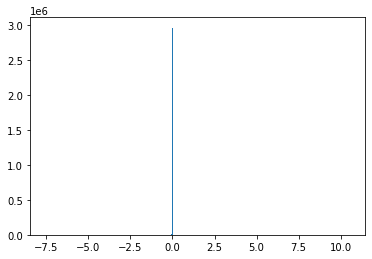

In [42]:
plt.hist(pi_eta_dist, bins=300)
plt.show()

In [29]:
pi_p_t_dist = reco_pi.p_t - pi.p_t

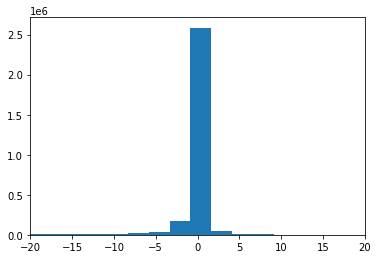

In [30]:
plt.hist(pi_p_t_dist, bins=500)
plt.xlim(-20, 20)
plt.show()

In [41]:
np.histogram(pi_p_t_dist, bins='scott')
# plt.show()

(array([1, 0, 0, ..., 0, 0, 1]),
 array([-500.49591064, -500.33324694, -500.17058324, ...,  748.27333592,
         748.43599963,  748.59866333]))

In [31]:
cdf = np.cumsum(pi_p_t_dist)
cdf_y = cdf_y/cdf_y.max()

array([ 4.62827682e-02, -5.51186562e-01, -9.34220314e-01, ...,
       -1.96640202e+06, -1.96640203e+06, -1.96640220e+06])

In [57]:
import numpy as np
import scipy.interpolate as interpolate

def inverse_transform_sampling(data, n_samples=1000):
    hist, bin_edges = np.histogram(data, bins='scott', density=True)
    cum_values = np.zeros(bin_edges.shape)
    cum_values[1:] = np.cumsum(hist*np.diff(bin_edges))
    inv_cdf = interpolate.interp1d(cum_values, bin_edges)
    r = np.random.rand(n_samples)
    return inv_cdf(r)

def its_2(data, n_samples):
    hist, bins = np.histogram(data, bins='scott')
    bin_midpoints = bins[:-1] + np.diff(bins)/2
    cdf = np.cumsum(hist)
    cdf = cdf / cdf[-1]
    values = np.random.rand(n_samples)
    value_bins = np.searchsorted(cdf, values)
    random_from_cdf = bin_midpoints[value_bins]
    return random_from_cdf

In [58]:
test = inverse_transform_sampling(pi_p_t_dist, n_samples=2983726)

In [59]:
test2 = its_2(pi_p_t_dist, n_samples=2983726)

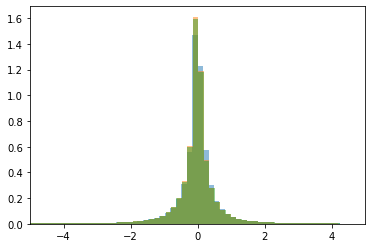

In [62]:
plt.hist(test, alpha=0.5, bins='scott', density=True)
plt.hist(test2, alpha=0.5, bins='scott', density=True)
plt.hist(pi_p_t_dist, alpha=0.5, bins='scott', density=True)
plt.xlim(-5, 5)
plt.show()

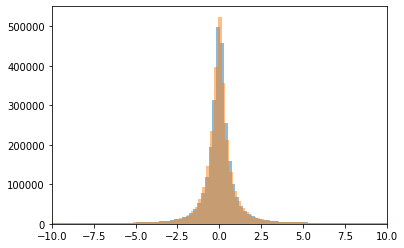

In [66]:
plt.hist(pi_p_t_dist-test2, bins='scott', alpha=0.5)
plt.hist(pi_p_t_dist-test, bins='scott', alpha=0.5)
plt.xlim(-10, 10)
plt.show()

In [67]:
np.mean(pi_p_t_dist-test2), np.std(pi_p_t_dist-test2, ddof=1)

(0.005249087363653257, 9.44772938935636)

In [68]:
np.mean(pi_p_t_dist-test), np.std(pi_p_t_dist-test, ddof=1) # test 2 is a bit better

(0.005442701911110066, 9.506635913284997)

In [70]:
a = 'pi_2'

In [71]:
a.split('_')

['pi', '2']